# A Bayesian Reassessment of Nearest-Neighbor Classification
## Numerical applications

Jérémie Stym-Popper - MVA student

Bayesian Machine Learning course

In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
from bayesian_model import metropolis_hastings, proba_class, sanity_check
from knn_baseline import iris 

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pickle as pkl

To start, we take a dataset from the scikit-learn library usually used for classical knn. We will then be able to compare the results obtained in the Bayesian framework with those obtained by the classical knn algorithm.

In [3]:
data = iris.data
target = iris.target

Now we run the Metropolis-Hastings algorithm presented in the article to obtain several samples of the parameters, which will themselves be used to estimate the probability for a new observation to belong to a class. A burn-in of the first 100 samples is performed.

In [132]:
list_param = metropolis_hastings(target, data, niter=1000, method="pseudo_likelihood")

100%|██████████| 1000/1000 [12:21<00:00,  1.35it/s]


In [77]:
list_param2 = metropolis_hastings(target, data, niter=1000, method="path_sampling")

  0%|          | 0/1000 [00:00<?, ?it/s]c:\Jérémie\Fac_Ensae\MVA\Cours\Bayesian ML\Project\repository\bayesian_model.py:88: RuntimeWarning: overflow encountered in exp
  normalization = np.exp(len(y)*np.log(2)+mc_sum)
c:\Jérémie\Fac_Ensae\MVA\Cours\Bayesian ML\Project\repository\bayesian_model.py:133: RuntimeWarning: invalid value encountered in double_scalars
  threshold = (model_conditionnal_up*jacobian(theta_new))*prob_kold\
 10%|▉         | 97/1000 [16:51<2:36:50, 10.42s/it]c:\Jérémie\Fac_Ensae\MVA\Cours\Bayesian ML\Project\repository\bayesian_model.py:133: RuntimeWarning: divide by zero encountered in double_scalars
  threshold = (model_conditionnal_up*jacobian(theta_new))*prob_kold\
100%|██████████| 1000/1000 [3:06:35<00:00, 11.20s/it] 


In [20]:
list_param3 = metropolis_hastings(target, data, niter=1000, method="z_sampling")

 17%|█▋        | 167/1000 [00:03<00:14, 57.19it/s]c:\Jérémie\Fac_Ensae\MVA\Cours\Bayesian ML\Project\repository\bayesian_model.py:108: RuntimeWarning: overflow encountered in exp
  return np.exp(beta/k*summation_given_target(y))*g_dens/np.exp(beta/k*summation_given_target(z))
c:\Jérémie\Fac_Ensae\MVA\Cours\Bayesian ML\Project\repository\bayesian_model.py:108: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(beta/k*summation_given_target(y))*g_dens/np.exp(beta/k*summation_given_target(z))
 37%|███▋      | 373/1000 [00:06<00:10, 61.93it/s]c:\Jérémie\Fac_Ensae\MVA\Cours\Bayesian ML\Project\repository\bayesian_model.py:108: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(beta/k*summation_given_target(y))*g_dens/np.exp(beta/k*summation_given_target(z))
100%|██████████| 1000/1000 [00:16<00:00, 60.08it/s]


### Visualization of the parameters

Text(0.5, 1.0, "Distribution of the estimated k's (method: path sampling)")

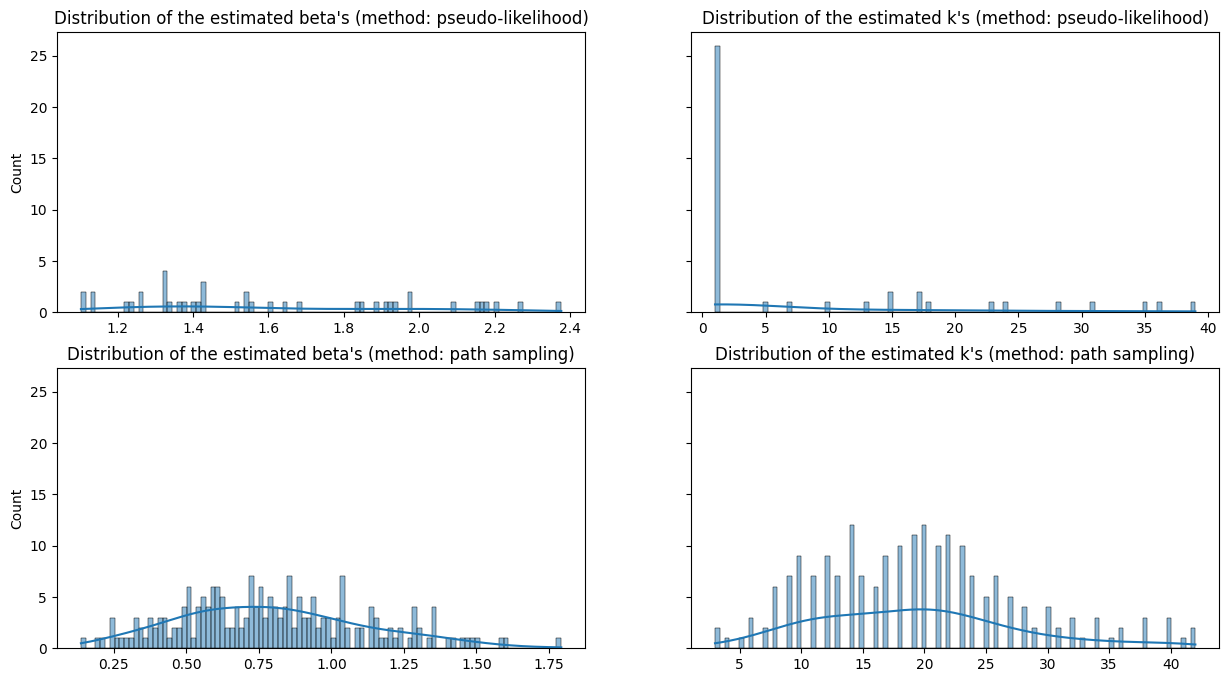

In [186]:
betas = list(list(zip(*list_param))[0])
ks = list(list(zip(*list_param))[1])
betas2 = list(list(zip(*list_param2))[0])
ks2 = list(list(zip(*list_param2))[1])

fig, axes = plt.subplots(2,2, figsize=(15,8), sharey=True)

sns.histplot(betas, bins=100, kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribution of the estimated beta's (method: pseudo-likelihood)")

sns.histplot(ks, bins=100, kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribution of the estimated k's (method: pseudo-likelihood)")

sns.histplot(betas2, bins=100, kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribution of the estimated beta's (method: path sampling)")

sns.histplot(ks2, bins=100, kde=True, ax=axes[1,1])
axes[1,1].set_title("Distribution of the estimated k's (method: path sampling)")



Text(0.5, 1.0, "Distribution of the estimated k's (method: auxiliary variable)")

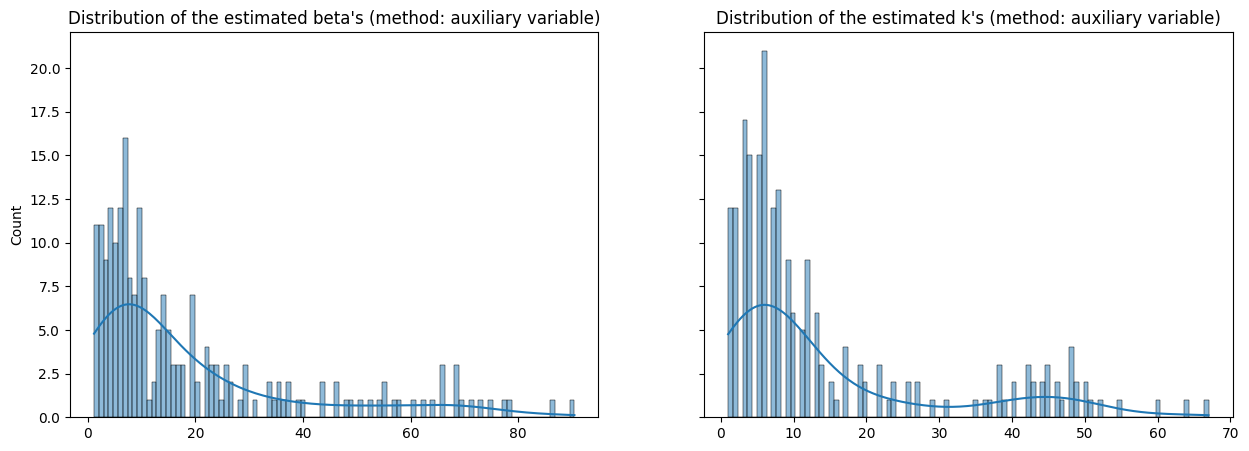

In [24]:
betas3 = list(list(zip(*list_param3))[0])
ks3 = list(list(zip(*list_param3))[1])
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)

sns.histplot(betas3, bins=100, kde=True, ax=axes[0])
axes[0].set_title("Distribution of the estimated beta's (method: auxiliary variable)")

sns.histplot(ks3, bins=100, kde=True, ax=axes[1])
axes[1].set_title("Distribution of the estimated k's (method: auxiliary variable)")

### Sanity check

Now we check if the probabilistic framework is consistant regarding the training set. We take the last observation (which belongs to class 2) and we observe the probability that this observation is assigned to this class. It will be like observing a data similar to one already seen.

In [137]:
sanity_check(data, target, list_param)

100%|██████████| 150/150 [00:46<00:00,  3.21it/s]

Accuracy: 83.3%


In [131]:
sanity_check(data, target, list_param2)

100%|██████████| 150/150 [03:51<00:00,  1.54s/it]

Accuracy: 82.0%


In [6]:
sanity_check(data, target, list_param3)

100%|██████████| 150/150 [04:36<00:00,  1.85s/it]

Accuracy: 96.7%


We add "dummy" tests in order to check if the parameters are important or not (see report for more details)

In [25]:
sanity_check(data, target, [(2.8, 15)])

100%|██████████| 150/150 [00:01<00:00, 139.49it/s]

Accuracy: 97.3%


In [37]:
for beta in [3, 15, 50, 10000]:
    sanity_check(data, target, [(beta, 15)])
    print(f"Beta {beta}")


100%|██████████| 150/150 [00:01<00:00, 140.11it/s]


Accuracy: 97.3%
Beta 3


100%|██████████| 150/150 [00:01<00:00, 140.32it/s]


Accuracy: 97.3%
Beta 15


100%|██████████| 150/150 [00:01<00:00, 140.03it/s]


Accuracy: 97.3%
Beta 50


100%|██████████| 150/150 [00:01<00:00, 132.98it/s]

Accuracy: 87.3%
Beta 10000


In [40]:
for k in [3, 15, 50, 100]:
    sanity_check(data, target, [(3, k)])
    print(f"k {k}")

100%|██████████| 150/150 [00:01<00:00, 137.82it/s]


Accuracy: 96.0%
k 3


100%|██████████| 150/150 [00:01<00:00, 140.68it/s]


Accuracy: 97.3%
k 15


100%|██████████| 150/150 [00:01<00:00, 136.98it/s]


Accuracy: 92.7%
k 50


100%|██████████| 150/150 [00:01<00:00, 136.49it/s]

Accuracy: 77.3%
k 100


The probability that the last observation belongs to class 2 is very high. The Bayesian model therefore seems consistent and we can now evaluate the error for each assignment. However, the results seem less consistent for the 2nd method (path sampling). It cames from the fact that the expectation was not summed over all y's possible but a set of random y (due to computation time).

### Visualization of results

We now keep the first two coordinates of each vector (the same method as in the scikit-learn documentation) to perform visualization later.

In [49]:
data = data[:,:2]

Always for visualization purposes, we keep the first two labels 0 and 1 of the previous data, so that it is possible to perform a binary classifcation and evaluate an uncertainty region.

In [75]:
essai_list = metropolis_hastings(target, data, niter=5000, method="pseudo_likelihood")

100%|██████████| 5000/5000 [1:01:05<00:00,  1.36it/s]


In [110]:
sanity_check(data, target, essai_list)

100%|██████████| 150/150 [04:51<00:00,  1.94s/it]

Accuracy: 84.0%


In [119]:
binary_y = target[:100]
binary_X = data[:100]

In [127]:
x, y = np.linspace(0,10,100), np.linspace(0,10,100)
X, Y = np.meshgrid(x, y)

In [145]:
display = np.empty((100,100))
id_r = 0 
id_c = 0
for i in X:
    for j in Y:
        display [id_r,id_c] = proba_class(1, np.array([i,j]).T, binary_y, binary_X, essai_list)
        id_c += 1
    id_c = 0
    id_r += 1

<AxesSubplot: >

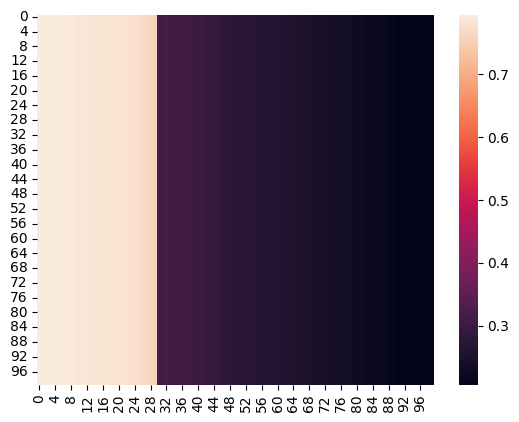

In [176]:
sns.heatmap(data = display, robust=True)

### Comparison with classical knn (source: scikit-learn)

Now perform the classical method of the knn for score and visualization comparison.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut

In [ ]:
X = iris.data
y = iris.target

clf = KNeighborsClassifier(n_neighbors=15, weights="uniform")
clf.fit(X, y)

C:\Users\jerem\AppData\Local\Temp\ipykernel_17424\3287449283.py:42: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


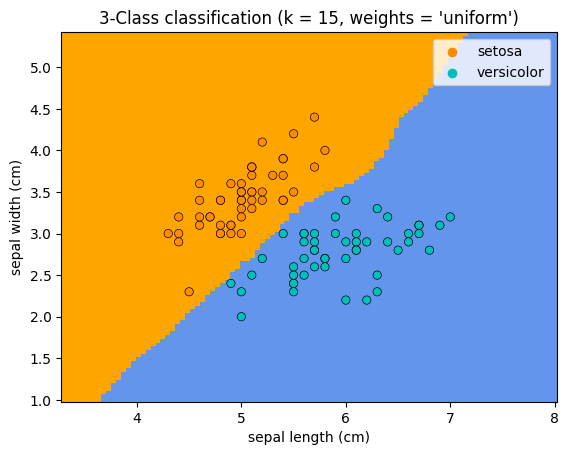

In [181]:
%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2][:100]
y = iris.target[:100]

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()